In [203]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import csv

In [204]:
# Processing the .csv file into the dataframe
df_cancerclassification=pd.read_csv("wdbc.csv",names = ['ID','Diagnosis','Radius_Mean','Texture_Mean','Perimeter_Mean','Area_Mean','Smoothness_Mean','Compactness_Mean','Concavity_Mean','Concave_Point_Mean','Symmetry_Mean','Fractal_Dimension_Mean','Radius_Standard_Error','Texture_Standard_Error','Perimeter_Standard_Error','Area_Standard_Error','Smoothness_Standard_Error','Compactness_Standard_Error','Concavity_Standard_Error','Concave_Points_Standard_Error','Symmetry_Standard_Error','Fractionaldimension_Standard_Error','Radius_Worst','Texture_Worst','Perimeter_Worst','Area_Worst','Smoothness_Worst','Compactness_Worst','Concavity_Worst','Concave_Points_Worst','Symmetry_Worst','Fractional_Dimension_Worst'])
df_cancerclassification

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [205]:
def predict(weight, bias, Z_t):
   
    Z = Z_t
    m = Z.shape[1]
    Y_prediction = np.zeros((1,m))
    S = sigmoid(np.dot(weight.T, Z) + bias)
    for i in range(S.shape[1]):
        Y_prediction[0, i] = 1 if S[0, i] > 0.5 else 0
       
    return Y_prediction

In [206]:
# Dropping the column "Id" from the data
df_cancerclassification = df_cancerclassification.drop("ID",axis=1)
df_cancerclassification

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [207]:
#mapping the column "Diagnosis" from M to 1 and B to 0
df_cancerclassification['Diagnosis']=df_cancerclassification['Diagnosis'].map({'M' : 1,'B': 0})
df_cancerclassification

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [208]:
x1 = df_cancerclassification.drop(['Diagnosis'], axis = 1)
y = df_cancerclassification['Diagnosis'].values


In [209]:
#Normalizing the data
x = (x1 - np.min(x1))/(np.max(x1) - np.min(x1)).values 
x

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Point_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractional_Dimension_Worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


In [210]:
# Partitioning the 80% of data into Training data and 20% to test data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print(' The size of the training "X" is', x_train.shape)
print(' The size of the testing "X" is', x_test.shape)
print(' The size of the training "Y" is', y_train.shape)
print(' The size of the testing "Y" is', y_test.shape)

 The size of the training "X" is (455, 30)
 The size of the testing "X" is (114, 30)
 The size of the training "Y" is (455,)
 The size of the testing "Y" is (114,)


In [211]:
#Partitioning the 20% of the test data into 10% of validation and 10% of test data
x_test, x_validation, y_test, y_validation = train_test_split(x_test,y_test, test_size=0.5, random_state=1)
print(' The size of the testing "Y" is', y_test.shape)
print(' The size of the validation "Y" is', y_validation.shape)
print(' The size of the testing "X" is', x_test.shape)
print(' The size of the validation "X" is', x_validation.shape)

 The size of the testing "Y" is (57,)
 The size of the validation "Y" is (57,)
 The size of the testing "X" is (57, 30)
 The size of the validation "X" is (57, 30)


In [212]:
x_train = x_train.T 
x_test = x_test.T 
y_train = y_train.T 
y_test = y_test.T 
x_validation = x_validation.T
y_validation = y_validation.T

##Reshape the Y to have proper shape
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])
y_validation = y_validation.reshape(1, y_validation.shape[0])

print(y_validation.shape)

(1, 57)


In [213]:
# Logistic Regression
import sklearn.datasets
epochs=15000
learning_rate= 0.05
def sigmoid(z):
    return 1/(1+np.exp(-z))
losstrack = []
m = x_train.shape[1]
w = np.zeros((30,1))
b=0
for epoch in range(epochs):
    z=np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz=p-y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate*dw
    b = b - learning_rate*db

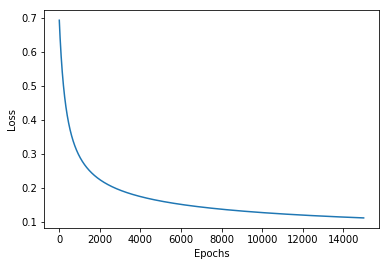

In [214]:
#Plotting
%matplotlib inline
plt.plot(losstrack)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [215]:
Y_prediction_validation = predict(w, b, x_validation)
print('Validation accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_validation - y_validation)) * 100))

Validation accuracy: 96.49122807017544 %


In [216]:
Y_prediction_test = predict(w, b, x_test)
print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))
print(Y_prediction_test)

test accuracy: 96.49122807017544 %
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
  0. 0. 1. 0. 0. 0. 0. 1. 0.]]


In [217]:
Y_prediction_train = predict(w, b, x_train)
print('train accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))

train accuracy: 97.58241758241758 %


In [218]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test.T,Y_prediction_test.T)
conf_matrix

array([[33,  1],
       [ 1, 22]], dtype=int64)

In [219]:
TP=conf_matrix[0][0]
FN=conf_matrix[0][1]
FP=conf_matrix[1][0]
TN=conf_matrix[1][1]
print(TP)
print(FN)
print(FP)
print(TN)

33
1
1
22


In [220]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
accuracy

0.9649122807017544

In [221]:
precision=(TP)/(TP+FP)
precision

0.9705882352941176

In [222]:
recall=(TP)/(TP+FN)
recall

0.9705882352941176

In [223]:
learning_rate= 0.005
for epoch in range(epochs):
    z=np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz=p-y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate*dw
    b = b - learning_rate*db


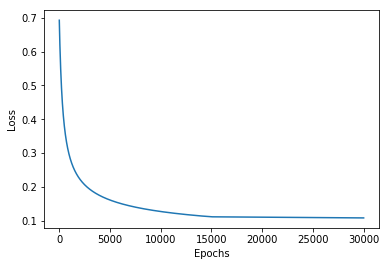

In [224]:
%matplotlib inline
plt.plot(losstrack)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

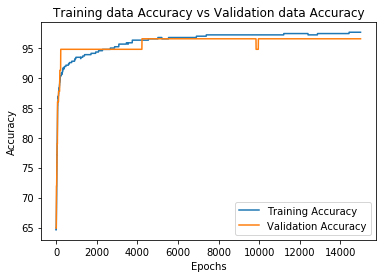

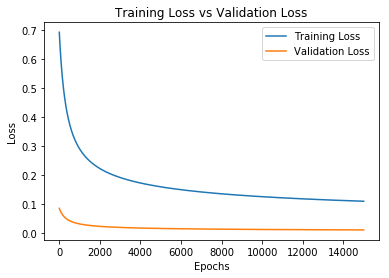

In [225]:
epochs=15000
learning_rate= 0.05

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
def accuracyplot(train_accuracy, val_accuracy, label):
    plt.plot(train_accuracy, label= 'Training Accuracy')
    plt.plot(val_accuracy, label= 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training data Accuracy vs Validation data Accuracy')
    plt.legend()
    plt.show()
    
def lossplot(train_loss, val_loss, label):
    plt.plot(train_loss, label= 'Training Loss')
    plt.plot(val_loss, label= 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.legend()
    plt.show()
m = x_train.shape[1]
w = np.zeros((30,1))
b=0
losstrack = []
valLoss = []
trainAccuracy = []
valAccuracy = []
label = " "
for epoch in range(epochs):
   
    z = np.dot(w.T, x_train) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), y_train) + np.multiply((1-y_train),np.log(1-p)))/m
    losstrack.append(np.squeeze(cost))
    dz = p - y_train
    dw = (1/m)* np.dot(x_train, dz.T)
    db = (1/m)* np.sum(dz)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    z1 = np.dot(w.T, x_validation) + b
    p1 = sigmoid(z1)
    validation_cost = -np.sum(np.multiply(np.log(p1), y_validation) + np.multiply((1-y_validation),np.log(1-p1)))/m
    valLoss.append(np.squeeze(validation_cost))
    Y_prediction_train = predict(w, b, x_train)
    Y_prediction_val = predict(w, b, x_validation)
    Y_prediction_train = Y_prediction_train.astype(int)[0]
    Y_prediction_val = Y_prediction_val.astype(int)[0]
    train_accuracy = ((100 - np.mean(np.abs(Y_prediction_train -  y_train[0])) * 100))
    val_accuracy = ((100 - np.mean(np.abs(Y_prediction_val -  y_validation[0])) * 100))
    trainAccuracy.append(train_accuracy)
    valAccuracy.append(val_accuracy)
accuracyplot(trainAccuracy, valAccuracy, learning_rate)
lossplot(losstrack, valLoss, learning_rate)

In [226]:
Y_prediction_test = predict(w, b, x_test)
print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

test accuracy: 96.49122807017544 %
